In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier #ランダムフォレスト
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import confusion_matrix #混同行列
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, KFold, cross_val_score
from sklearn.preprocessing  import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import (BaggingRegressor, AdaBoostRegressor,GradientBoostingRegressor, 
                              RandomForestRegressor,  GradientBoostingRegressor)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from mlxtend.regressor import StackingCVRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
import lightgbm as lgb #LightGBM
import warnings
warnings.filterwarnings("ignore")
# You can go offline on demand by using
# cf.go_offline() 
# initiate notebook for offline plot
# init_notebook_mode(connected=False)         
# set some display options:
plt.rcParams['figure.dpi'] = 100
# colors = px.colors.qualitative.Prism
# pio.templates.default = "plotly_white"

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso
)
%matplotlib inline
#グラフのフォント変換
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
# !pip install xgboost
# !pip install mlxtend
# !pip install lightgbm

In [3]:
#!pip install azureml-interpret

In [4]:
df = pd.read_csv('uci-secom.csv')
print(df.shape)
df.head()

(1567, 592)


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [5]:
df[df.duplicated()]
#重複なし

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail


In [6]:
#時系列順に並び変える
df = df.sort_values('Time')
df = df.reset_index(drop=True)
df.tail()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
1562,2008-12-10 02:59:00,2968.78,2451.53,2207.1000,1298.4309,1.0251,100.0,96.9478,0.1203,1.3985,...,185.3578,0.4972,0.0133,0.0036,2.6718,0.0167,0.0310,0.0084,185.3578,-1
1563,2008-12-10 03:21:00,2898.17,2547.65,NaN,NaN,NaN,NaN,NaN,0.0000,1.4425,...,NaN,0.5036,0.0161,0.0040,3.1902,0.0167,0.0310,0.0084,185.3578,-1
1564,2008-12-10 03:28:00,3045.87,2493.72,2168.5111,1171.6442,0.8752,100.0,101.6567,0.1235,1.5442,...,NaN,0.4998,0.0234,0.0050,4.6735,0.0167,0.0310,0.0084,185.3578,-1
1565,2008-12-10 08:19:00,2926.38,2383.76,2207.1000,1298.4309,1.0251,100.0,96.9478,0.1203,1.3561,...,128.6840,0.4986,0.0132,0.0038,2.6468,0.0172,0.0222,0.0072,128.6840,-1
1566,2008-12-10 18:47:00,3033.46,2424.39,2204.6667,1078.7860,0.9152,100.0,103.9611,0.1196,1.2898,...,58.7670,0.5008,0.0140,0.0037,2.7936,0.0246,0.0145,0.0038,58.7670,-1


In [7]:
#目的変数の1,0化
for i,value in enumerate(df['Pass/Fail']):
    if value == -1:
        df['Pass/Fail'][i] = 0
    else:
        df['Pass/Fail'][i] = 1

In [8]:
#欠損値の確認
def null_values(df):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

df_na = null_values(df)
df_na_index = df_na.index

In [9]:
#45%以上の欠損値の除外
df_na_columns = df_na.query('Percentage > 45').index #32個あり
df = df.drop(df_na_columns,axis=1)
print(df.shape)
df.head()

(1567, 560)


,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-01-08 02:02:00,3016.64,2492.80,2246.4889,1006.9548,1.0997,100.0,103.3222,0.1184,1.5068,...,21.2281,0.4984,0.0146,0.0040,2.9336,0.0296,0.0062,0.0018,20.8909,0
1,2008-01-08 05:52:00,2980.84,2628.76,2187.5222,1268.6598,1.4503,100.0,102.4622,0.1233,1.4672,...,16.3616,0.5010,0.0289,0.0061,5.7753,0.0297,0.0556,0.0150,187.3554,1
2,2008-01-08 10:20:00,2847.81,2461.38,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,1.4970,...,18.4846,0.4970,0.0093,0.0028,1.8722,0.0343,0.0115,0.0032,33.4515,0
3,2008-01-08 10:26:00,NaN,2544.52,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,1.4727,...,11.3646,0.5053,0.0121,0.0029,2.3957,0.0139,0.0187,0.0064,134.2014,0
4,2008-01-08 11:28:00,2975.64,2508.28,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,1.5079,...,21.8407,0.5001,0.0119,0.0033,2.3709,0.0139,0.0187,0.0064,134.2014,0


In [10]:
#欠損値の補完をしてみる
df_median = df.fillna(df.median())#中央値での補完
df_0 = df.fillna(0)

In [11]:
#月のデータ抽出
df["Month"] = pd.to_datetime(df["Time"]).dt.strftime("%Y-%m")
df["Hour"] = pd.to_datetime(df["Time"]).dt.strftime("%H")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

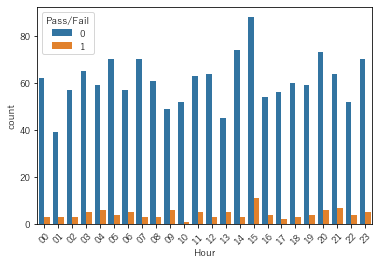

In [12]:
sns.countplot("Hour", data = df,hue='Pass/Fail')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

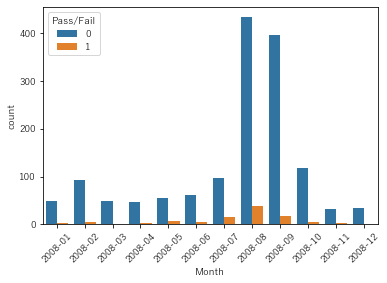

In [13]:
sns.countplot("Month", data = df,hue='Pass/Fail')
plt.xticks(rotation=45)

In [14]:
#グラフ詳細
print('月単位\n',df['Month'].value_counts())
print('不良品のカウント',df.groupby(['Month','Pass/Fail'])['Time'].count())

月単位
 2008-08    471
2008-09    413
2008-10    123
2008-07    114
2008-02     98
2008-06     67
2008-05     62
2008-01     51
2008-03     50
2008-04     49
2008-11     35
2008-12     34
Name: Month, dtype: int64
不良品のカウント Month    Pass/Fail
2008-01  0             48
         1              3
2008-02  0             93
         1              5
2008-03  0             49
         1              1
2008-04  0             46
         1              3
2008-05  0             55
         1              7
2008-06  0             61
         1              6
2008-07  0             98
         1             16
2008-08  0            433
         1             38
2008-09  0            396
         1             17
2008-10  0            117
         1              6
2008-11  0             33
         1              2
2008-12  0             34
Name: Time, dtype: int64


割合的にみると**7月**が1番不良品の数が多くなってしまっている

In [15]:
# #データの標準化
# df_median = df_median.drop(['Time','Pass/Fail'],axis=1)
# scaler = StandardScaler()
# scaler.fit(df_median)
# scaler.transform(df_median)
# df_median = pd.DataFrame(scaler.transform(df_median), columns=df_median.columns)
# df_median = pd.concat([df_median,df[['Pass/Fail','Time']]],axis=1)

In [16]:
#訓練データとテストデータの分割 train=1~8月 test=9~12月
x_train = df_median.query('Time < "2008-08-31"').drop(['Time','Pass/Fail'],axis=1)
x_test = df_median.query('Time > "2008-08-31"').drop(['Time','Pass/Fail'],axis=1)
y_train = df_median.query('Time < "2008-08-31"')['Pass/Fail']
y_test = df_median.query('Time > "2008-08-31"')['Pass/Fail']

In [17]:
x_train.shape, y_train.shape , x_test.shape, y_test.shape

((944, 558), (944,), (623, 558), (623,))

### 決定木の実装
https://qiita.com/y-vectorfield/items/4315338d11d4ba8efb0d

木の深さ:2

train_score: 0.924
test_score: 0.952

正答率:0.952
適合率:0.000
再現率:0.000
F1スコア:0.000



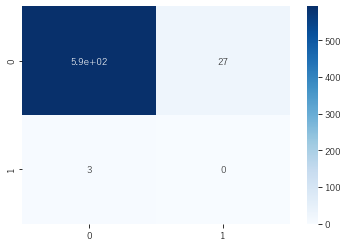

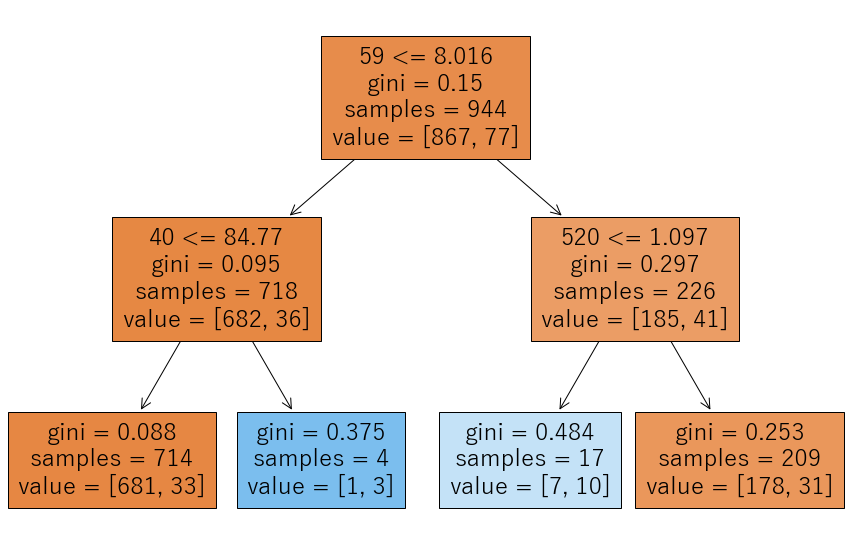

決定木
auc:0.598


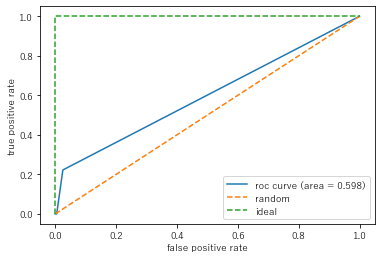

木の深さ:3

train_score: 0.934
test_score: 0.949

正答率:0.949
適合率:0.111
再現率:0.273
F1スコア:0.158



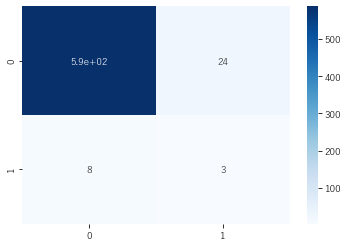

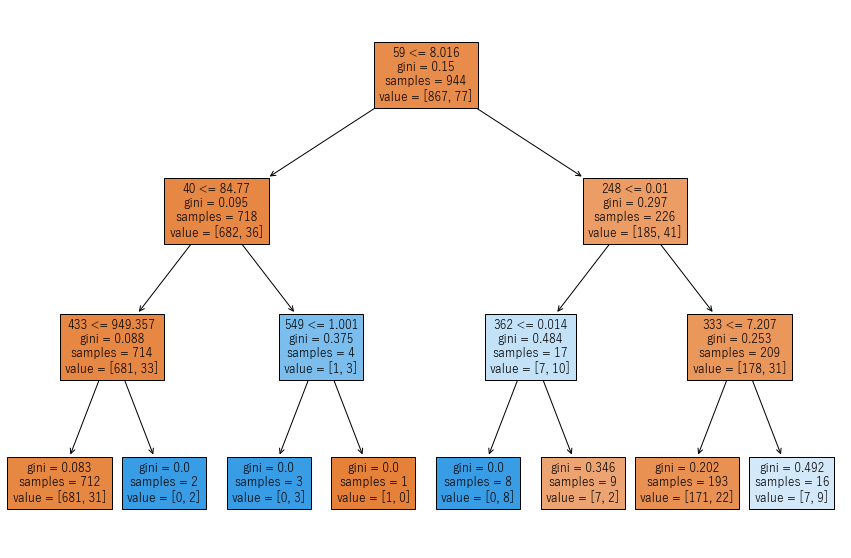

決定木
auc:0.595


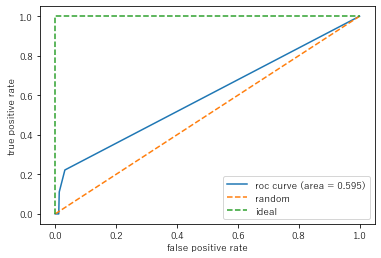

木の深さ:4

train_score: 0.946
test_score: 0.944

正答率:0.944
適合率:0.111
再現率:0.214
F1スコア:0.146



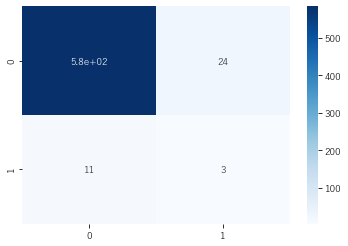

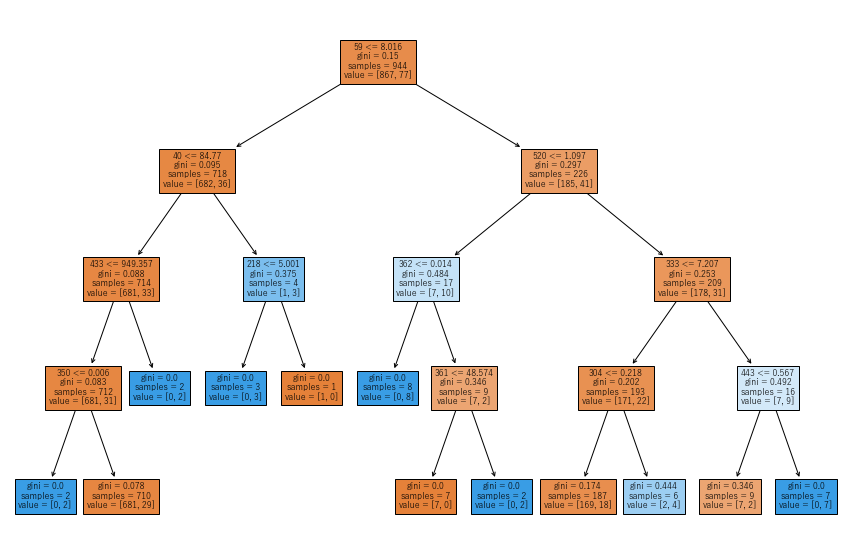

決定木
auc:0.593


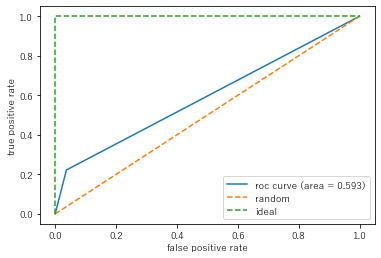

木の深さ:5

train_score: 0.954
test_score: 0.942

正答率:0.942
適合率:0.111
再現率:0.200
F1スコア:0.143



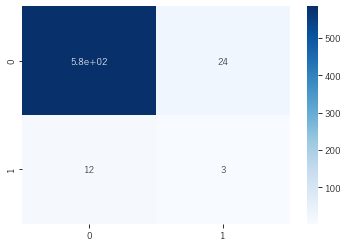

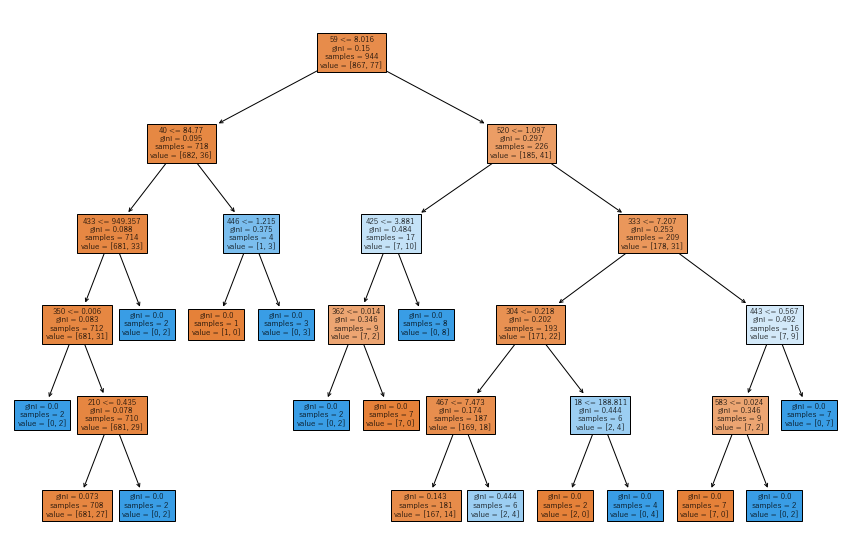

決定木
auc:0.592


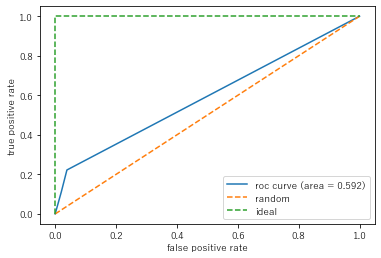

木の深さ:6

train_score: 0.959
test_score: 0.945

正答率:0.945
適合率:0.111
再現率:0.231
F1スコア:0.150



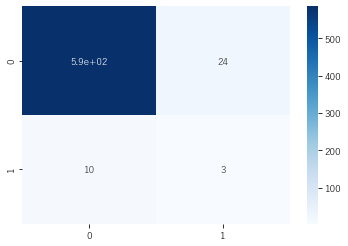

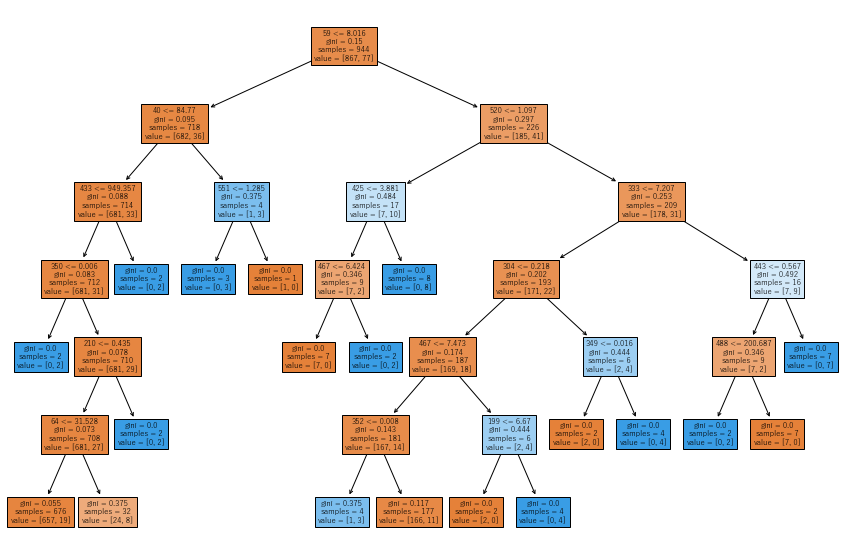

決定木
auc:0.642


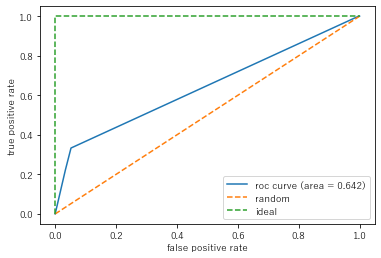

木の深さ:7

train_score: 0.965
test_score: 0.937

正答率:0.937
適合率:0.111
再現率:0.167
F1スコア:0.133



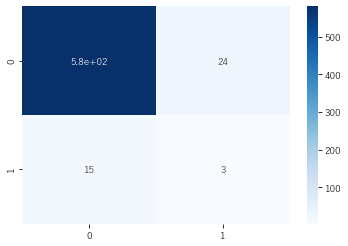

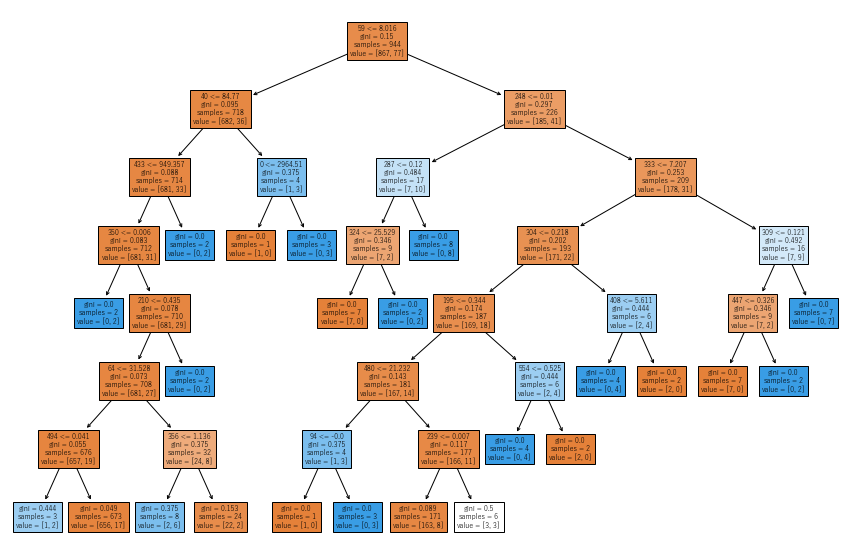

決定木
auc:0.639


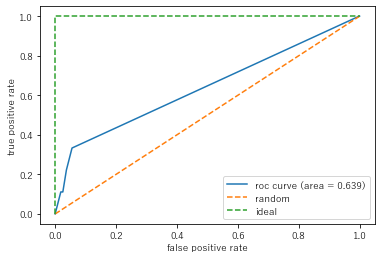

木の深さ:8

train_score: 0.976
test_score: 0.931

正答率:0.931
適合率:0.074
再現率:0.100
F1スコア:0.085



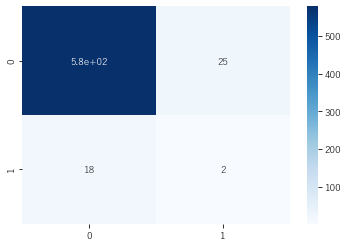

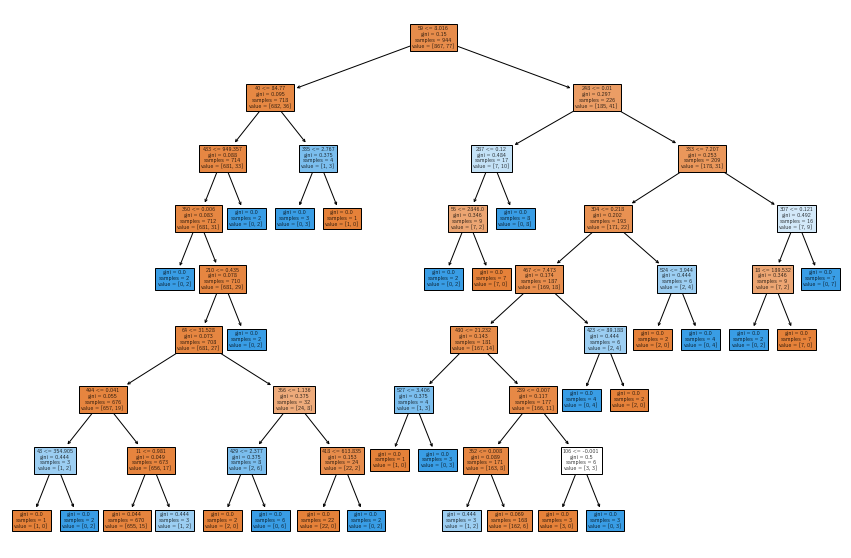

決定木
auc:0.505


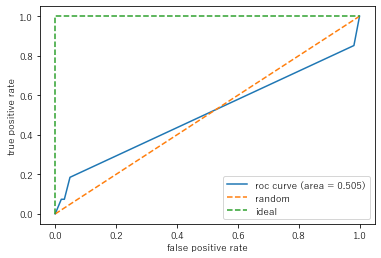

木の深さ:9

train_score: 0.979
test_score: 0.933

正答率:0.933
適合率:0.074
再現率:0.105
F1スコア:0.087



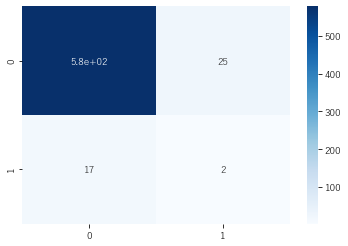

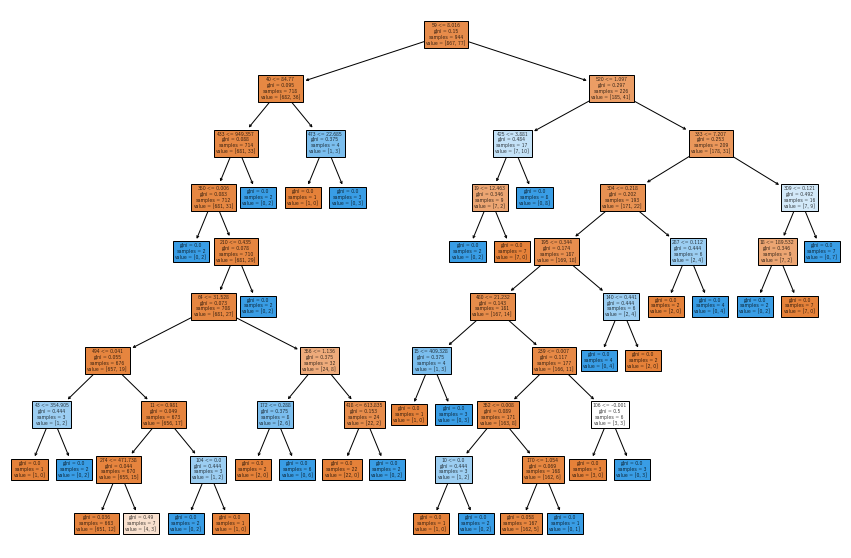

決定木
auc:0.498


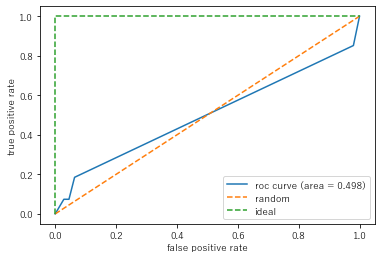

木の深さ:10

train_score: 0.985
test_score: 0.923

正答率:0.923
適合率:0.111
再現率:0.111
F1スコア:0.111



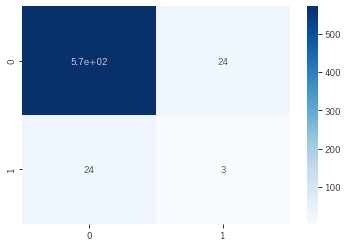

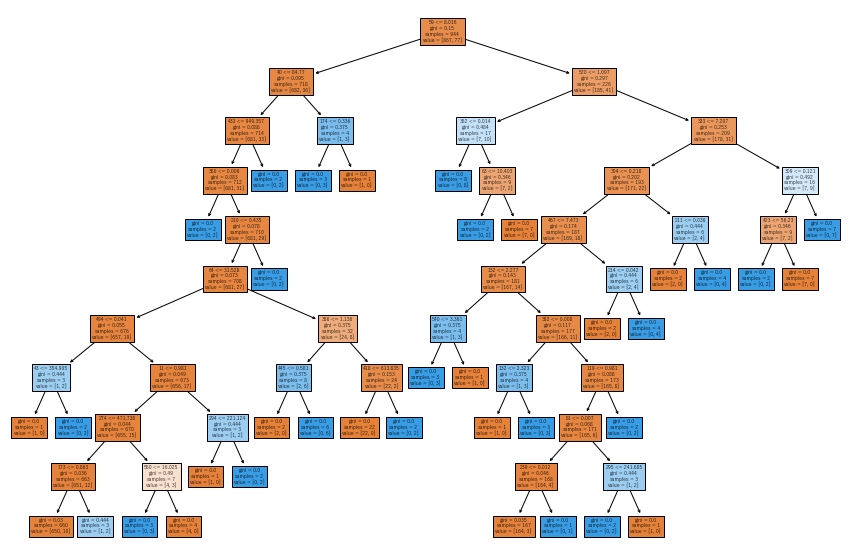

決定木
auc:0.506


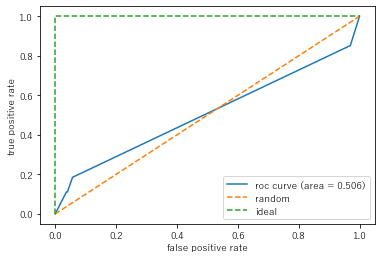

In [18]:
#試行回数を増やしてより綿密に可視化
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import confusion_matrix #混同行列
#学習モデルの評価(代表的な評価指標を使用)
from sklearn.metrics import accuracy_score #正答率(全てのサンプル中正解したスコアを指す)
from sklearn.metrics import precision_score #適合率(正しく判断されているかどうか?) 誤診を防ぎたい
from sklearn.metrics import recall_score #再現率(正しく再現されているかどうか？) 見逃しを防ぎたい
from sklearn.metrics import f1_score #F1スコア(適合率と再現率の調和平均)
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

max_depth = [2,3,4,5,6,7,8,9,10] #木の深さ

for max_depth in max_depth:
    tree_model = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
    tree_model = tree_model.fit(x_train, y_train)

    print(f'木の深さ:{max_depth}\n')

    #モデルの検証
    print(f'train_score: {tree_model.score(x_train,y_train):.3f}')
    print(f'test_score: {tree_model.score(x_test,y_test):.3f}\n')

    #決定木のモデルの評価
    tree_predict = tree_model.predict(x_test)

    tree_cm = confusion_matrix(tree_predict, y_test)

    sns.heatmap(tree_cm,annot=True, cmap='Blues')
    print(f'正答率:{accuracy_score(tree_predict,y_test):.3f}')
    print(f'適合率:{precision_score(tree_predict,y_test):.3f}')
    print(f'再現率:{recall_score(tree_predict,y_test):.3f}')
    print(f'F1スコア:{f1_score(tree_predict,y_test):.3f}\n')



    fig = plt.figure(figsize=(15, 10))
    plot_tree(tree_model, feature_names=x_train.columns,filled=True)
    plt.show()
    
    Y_score = tree_model.predict_proba(x_test)[:, 1] # 検証データがクラス1に属する確率
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=Y_score)
    print('決定木')
    print(f'auc:{roc_auc_score(y_true=y_test, y_score=Y_score):.3f}')

    plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], linestyle='--', label='random')
    plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
    plt.legend()
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

    #画像の保存
    #fig.savefig(f'decision_tree_images/decision_tree_depth_{max_depth}.png')

### 「40」「520」「59」の関連性を確認する

#### 単変量の分析

In [19]:
def targethist(df, target, save=False, kind='hist', **kwards):
     
    columns = df.columns[df.columns != target]
    pdf = df.pivot_table(index=df.index, columns=target)
     
    for column in columns:
         
        ax = pdf.loc[:, column].plot(kind=kind, title=column, **kwards)
         
        if save==True:
            ax.get_figure().savefig(column+".png") 

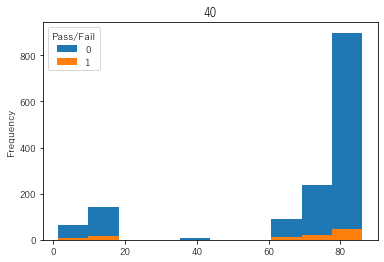

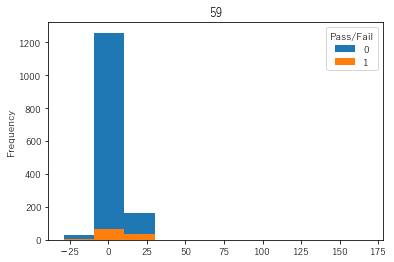

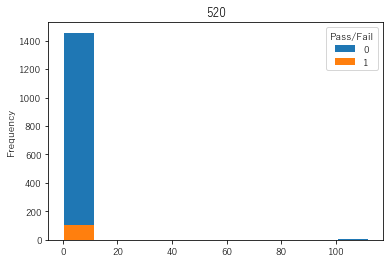

In [20]:
df_importance_features = df[['40','59','520','Pass/Fail']]
targethist(df_importance_features, target="Pass/Fail")

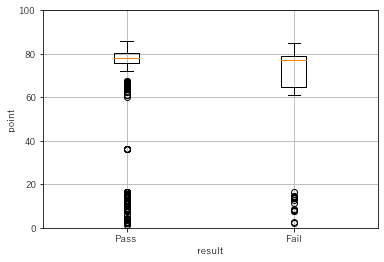

In [21]:
#40の箱ひげ図

# 合格
Pass = df_median[df_median['Pass/Fail'] == 0]['40']
# 不合格
Fail = df_median[df_median['Pass/Fail'] == 1]['40']
# 点数のタプル
points = (Pass, Fail)

# 箱ひげ図
fig, ax = plt.subplots()

bp = ax.boxplot(points)
ax.set_xticklabels(['Pass', 'Fail'])

# plt.title('Box plot')
plt.xlabel('result')
plt.ylabel('point')
# Y軸のメモリのrange
plt.ylim([0,100])
plt.grid()

# 描画
plt.show()

説明変数「40」の散布図


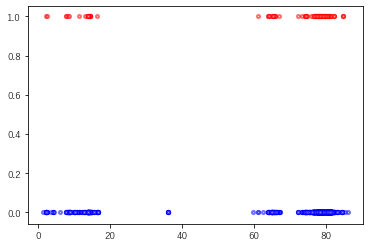

In [22]:
print(f'説明変数「40」の散布図')
x1 = df[df['Pass/Fail'] == 0]['40']
y1 = df[df['Pass/Fail'] == 0]['Pass/Fail']
x2 = df[df['Pass/Fail'] == 1]['40']
y2 = df[df['Pass/Fail'] == 1]['Pass/Fail']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# x1, y1を青色でプロット
ax.scatter(x1, y1, s=10, alpha=0.5, linewidths=2, c='#aaaaFF', edgecolors='b')
# x2, y2を赤色でプロット
ax.scatter(x2, y2, s=10, alpha=0.5, linewidths=2, c='#FFaaaa', edgecolors='r')
plt.show()

**Student(スチューデント)のt検定**<br/>
https://qiita.com/suaaa7/items/745ac1ca0a8d6753cf60

In [23]:
#対応しない2郡間の差の検定
A_var = np.var(Pass, ddof=1)  # Aの不偏分散
B_var = np.var(Fail, ddof=1)  # Bの不偏分散
A_df = len(Pass) - 1  # Aの自由度
B_df = len(Fail) - 1  # Bの自由度
f = A_var / B_var  # F比の値
one_sided_pval1 = stats.f.cdf(f, A_df, B_df)  # 片側検定のp値 1
one_sided_pval2 = stats.f.sf(f, A_df, B_df)   # 片側検定のp値 2
two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値

print('F:       ', round(f, 3))
print('p-value: ', round(two_sided_pval, 3))

F:        0.794
p-value:  0.091


**p > 0.05なので、帰無仮説は棄却されず、2群間は等分散であることが示唆されました。**

In [24]:
stats.ttest_ind(Pass, Fail)

Ttest_indResult(statistic=2.1180583431864877, pvalue=0.03432739228196954)

**p < 0.05なので、帰無仮説は棄却され、2群間に差があるということが判断された**

In [25]:
stats.mannwhitneyu(Pass, Fail, alternative='two-sided')

MannwhitneyuResult(statistic=90037.5, pvalue=0.00174126671406022)

**p < 0.05なので、帰無仮説は棄却され、2群の代表値には差があるとはいえる。**

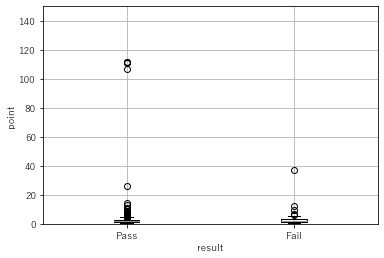

In [26]:
#520の箱ひげ図

# 合格
Pass = df_median[df_median['Pass/Fail'] == 0]['520']
# 不合格
Fail = df_median[df_median['Pass/Fail'] == 1]['520']
# 点数のタプル
points = (Pass, Fail)

# 箱ひげ図
fig, ax = plt.subplots()

bp = ax.boxplot(points)
ax.set_xticklabels(['Pass', 'Fail'])

# plt.title('Box plot')
plt.xlabel('result')
plt.ylabel('point')
# Y軸のメモリのrange
plt.ylim([0,150])
plt.grid()

# 描画
plt.show()

説明変数「520」の散布図


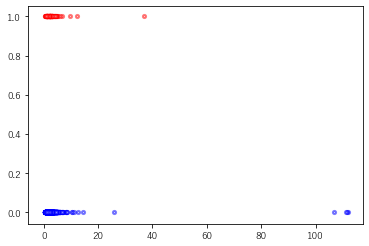

In [27]:
print(f'説明変数「520」の散布図')
x1 = df[df['Pass/Fail'] == 0]['520']
y1 = df[df['Pass/Fail'] == 0]['Pass/Fail']
x2 = df[df['Pass/Fail'] == 1]['520']
y2 = df[df['Pass/Fail'] == 1]['Pass/Fail']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# x1, y1を青色でプロット
ax.scatter(x1, y1, s=10, alpha=0.5, linewidths=2, c='#aaaaFF', edgecolors='b')
# x2, y2を赤色でプロット
ax.scatter(x2, y2, s=10, alpha=0.5, linewidths=2, c='#FFaaaa', edgecolors='r')
plt.show()

**Student(スチューデント)のt検定**<br/>
https://qiita.com/suaaa7/items/745ac1ca0a8d6753cf60

In [28]:
#対応しない2郡間の差の検定
A_var = np.var(Pass, ddof=1)  # Aの不偏分散
B_var = np.var(Fail, ddof=1)  # Bの不偏分散
A_df = len(Pass) - 1  # Aの自由度
B_df = len(Fail) - 1  # Bの自由度
f = A_var / B_var  # F比の値
one_sided_pval1 = stats.f.cdf(f, A_df, B_df)  # 片側検定のp値 1
one_sided_pval2 = stats.f.sf(f, A_df, B_df)   # 片側検定のp値 2
two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値

print('F:       ', round(f, 3))
print('p-value: ', round(two_sided_pval, 3))

F:        2.366
p-value:  0.0


**p < 0.05なので、帰無仮説は棄却され、2群間は等分散であるとはいえないことが示唆されました。**

In [29]:
stats.ttest_ind(Pass, Fail)[1]

0.7609671284639357

In [30]:
stats.mannwhitneyu(Pass, Fail, alternative='two-sided')

MannwhitneyuResult(statistic=74484.5, pvalue=0.7212267088833375)

**p > 0.05なので、帰無仮説は棄却されず、2群間に差はないということが判断された**

In [31]:
stats.mannwhitneyu(Pass, Fail, alternative='two-sided')

MannwhitneyuResult(statistic=74484.5, pvalue=0.7212267088833375)

#### 多変量の分析

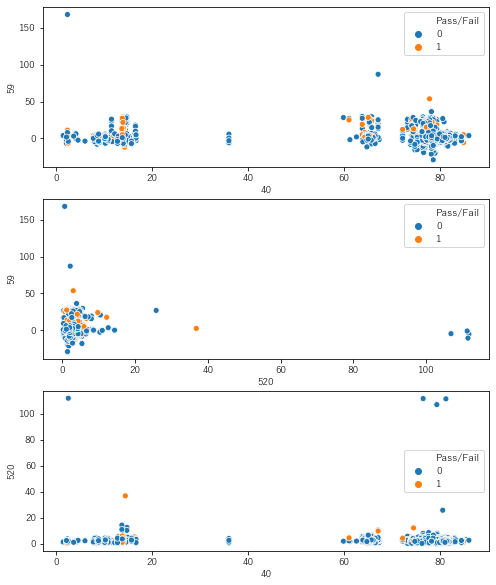

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(8,10))

sns.scatterplot(df['40'],df['59'],hue=df['Pass/Fail'],ax=ax1)
sns.scatterplot(df['520'],df['59'],hue=df['Pass/Fail'],ax=ax2)
sns.scatterplot(df['40'],df['520'],hue=df['Pass/Fail'],ax=ax3)

plt.show()

**大きな特徴は見受けられない**

#### 全体の変数のを**t検定,u検定**してみる

In [33]:
np.set_printoptions(threshold=np.inf)
print(x_train.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '576', '577', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=558)


In [34]:
#t検定とu検定はtraindataで実装する(後の比較を行うため)
x_train_t_u = x_train.copy()
x_train_t_u['Pass/Fail'] = y_train

In [35]:
features=x_train.columns
depend_feature_t_certificate=[]
depend_feature_u_certificate=[]

for features in features:
    # 合格
    Pass = x_train_t_u[x_train_t_u['Pass/Fail'] == 0][features]
    # 不合格
    Fail = x_train_t_u[x_train_t_u['Pass/Fail'] == 1][features]

    #対応しない2郡間の差の検定
    A_var = np.var(Pass, ddof=1)  # Aの不偏分散
    B_var = np.var(Fail, ddof=1)  # Bの不偏分散
    A_df = len(Pass) - 1  # Aの自由度
    B_df = len(Fail) - 1  # Bの自由度
    
    try:
        f = A_var / B_var  # F比の値
        one_sided_pval1 = stats.f.cdf(f, A_df, B_df)  # 片側検定のp値 1
        one_sided_pval2 = stats.f.sf(f, A_df, B_df)   # 片側検定のp値 2
        two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値

#         print(f'説明変数「{features}」のt検定P値:{stats.ttest_ind(Pass, Fail)[1]}')
#         print(f'説明変数「{features}」のu検定P値:{stats.mannwhitneyu(Pass, Fail, alternative='two-sided')[1]}')
        
        if stats.ttest_ind(Pass, Fail)[1] < 0.05:
            depend_feature_t_certificate.append(features)
        elif stats.mannwhitneyu(Pass, Fail, alternative='two-sided')[1] < 0.05:
            depend_feature_u_certificate.append(features)
        else:
            continue
    except ZeroDivisionError:
        pass

In [36]:
print(f't検定で有意差があった特徴量の数:{len(depend_feature_t_certificate)}')
print(f'u検定で有意差があった特徴量の数:{len(depend_feature_u_certificate)}')

t検定で有意差があった特徴量の数:70
u検定で有意差があった特徴量の数:13


### t検定,u検定にてそれぞれで該当する変数のみでLasso回帰の実装を試みる

In [37]:
x_train_t_certificate = x_train.copy()
x_test_t_certificate = x_test.copy()

x_train_u_certificate = x_train.copy()
x_test_u_certificate = x_test.copy()

#変数の選定
x_train_t_certificate = x_train_t_certificate[depend_feature_t_certificate]
x_test_t_certificate = x_test_t_certificate[depend_feature_t_certificate]

x_train_u_certificate = x_train_u_certificate[depend_feature_u_certificate]
x_test_u_certificate = x_test_u_certificate[depend_feature_u_certificate]

print(x_train_t_certificate.shape,x_test_t_certificate.shape)
print(x_train_u_certificate.shape,x_test_u_certificate.shape)

(944, 70) (623, 70)
(944, 13) (623, 13)


Lasso alpha=0.0001
Cross-Validation scores: [0.92063492 0.92063492 0.91534392 0.91534392 0.92021277]
Average score: 0.918
使用された特徴量の数: 1

Lasso回帰
auc:0.505


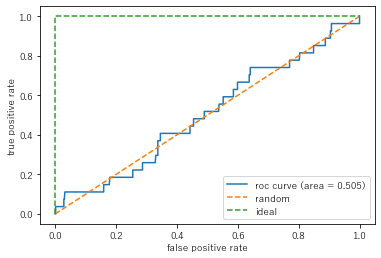

Lasso alpha=0.001
Cross-Validation scores: [0.92063492 0.92063492 0.92063492 0.91534392 0.92021277]
Average score: 0.919
使用された特徴量の数: 8

Lasso回帰
auc:0.525


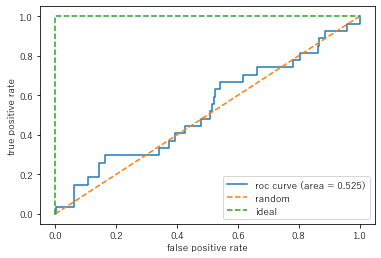

Lasso alpha=0.01
Cross-Validation scores: [0.91534392 0.92063492 0.9047619  0.9047619  0.91489362]
Average score: 0.912
使用された特徴量の数: 13

Lasso回帰
auc:0.620


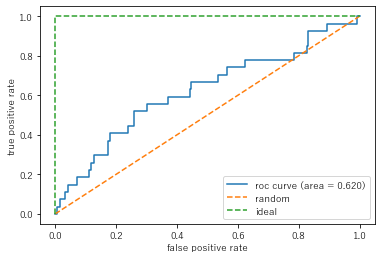

Lasso alpha=0.1
Cross-Validation scores: [0.91534392 0.91005291 0.9047619  0.8994709  0.91489362]
Average score: 0.909
使用された特徴量の数: 29

Lasso回帰
auc:0.615


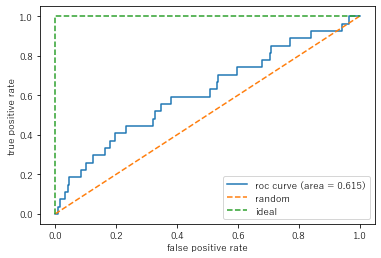

Lasso alpha=1.0
Cross-Validation scores: [0.92063492 0.9047619  0.88359788 0.89417989 0.92021277]
Average score: 0.905
使用された特徴量の数: 38

Lasso回帰
auc:0.565


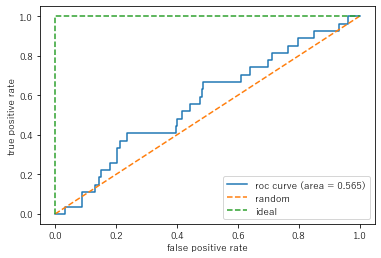

Lasso alpha=10.0
Cross-Validation scores: [0.92592593 0.89417989 0.85185185 0.86243386 0.92553191]
Average score: 0.892
使用された特徴量の数: 51

Lasso回帰
auc:0.574


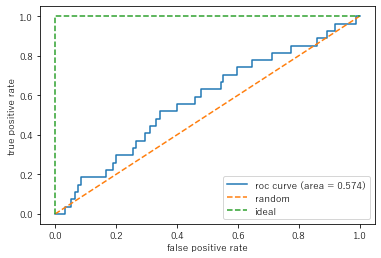

Lasso alpha=100.0
Cross-Validation scores: [0.92592593 0.8994709  0.84656085 0.87830688 0.92553191]
Average score: 0.895
使用された特徴量の数: 65

Lasso回帰
auc:0.584


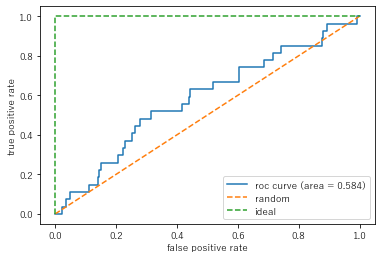

In [38]:
#t検定
#交差検証とハイパーパラメータのチューニング
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
param_grid = [0.0001 , 0.001, 0.01, 0.1, 1.0, 10.0,100.0]

for alpha in param_grid:
    clf_lasso = LogisticRegression(C=alpha,penalty = "l1",solver = "liblinear") #lassoと同じ正則化
    clf_lasso.fit(x_train_t_certificate,y_train)
    predict_lasso = clf_lasso.predict(x_test_t_certificate)
    predict_lasso_prob = clf_lasso.predict_proba(x_test_t_certificate)
    
    print(f'Lasso alpha={alpha}')
#     print(clf_lasso.intercept_)
#     print(clf_lasso.coef_)
    scores = cross_val_score(clf_lasso, x_train_t_certificate, y_train,cv=5)
    print(f'Cross-Validation scores: {scores}') # 各分割におけるスコア
    print(f'Average score: {np.mean(scores):.3f}') #平均スコア
#     print(f'trainning data:に対しての精度: {clf_lasso.score(x_train,y_train):.3f}')
#     print(f'test data:に対しての精度: {clf_lasso.score(x_test,y_test):.3f}')
    print(f'使用された特徴量の数: {np.sum(clf_lasso.coef_ != 0)}\n')
    
    Y_score = clf_lasso.predict_proba(x_test_t_certificate)[:, 1] # 検証データがクラス1に属する確率
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=Y_score)
    print('Lasso回帰')
    print(f'auc:{roc_auc_score(y_true=y_test, y_score=Y_score):.3f}')

    plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], linestyle='--', label='random')
    plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
    plt.legend()
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()


In [39]:
#上記の図からalphaのbestparamaetaを決定
best_param=0.01
clf_lasso = LogisticRegression(C=best_param,penalty = "l1",solver = "liblinear") #lassoと同じ正則化
clf_lasso.fit(x_train_t_certificate,y_train)
predict_lasso = clf_lasso.predict(x_test_t_certificate)
predict_lasso_prob = clf_lasso.predict_proba(x_test_t_certificate)

# print(f'lasso回帰の係数: {clf_lasso.coef_}')
print(f'lasso回帰で使用された特徴量の数: {np.sum(clf_lasso.coef_ != 0)}')

#lasso回帰によって絞り込まれた特徴量を抽出
lasso_feature_importance = pd.DataFrame(clf_lasso.coef_).T
lasso_feature_importance['columns'] = pd.DataFrame(x_train_t_certificate.columns)
lasso_feature_importance = lasso_feature_importance.rename(columns={0: 'coef'})
lasso_feature_importance_column = lasso_feature_importance.query('coef != 0')['columns']

lasso回帰で使用された特徴量の数: 13


In [40]:
#trainとtestに格納
x_train_t_certificate = x_train_t_certificate.loc[:,lasso_feature_importance_column]
x_test_t_certificate = x_test_t_certificate.loc[:,lasso_feature_importance_column]

In [41]:
len(x_train_t_certificate.columns)

13

In [42]:
pd.DataFrame(x_train_t_certificate.columns).to_csv(f'特徴量{len(x_train_t_certificate.columns)}個(t検定とLasso).csv',index=False,header=False)

Lasso alpha=0.0001
Cross-Validation scores: [0.92063492 0.92063492 0.91534392 0.91534392 0.92021277]
Average score: 0.918
使用された特徴量の数: 1

Lasso回帰
auc:0.516


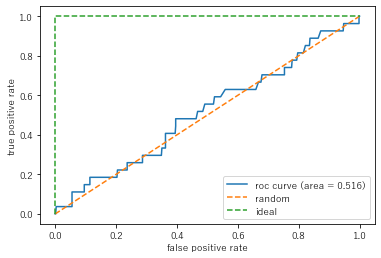

Lasso alpha=0.001
Cross-Validation scores: [0.92063492 0.92063492 0.91534392 0.91534392 0.92021277]
Average score: 0.918
使用された特徴量の数: 1

Lasso回帰
auc:0.516


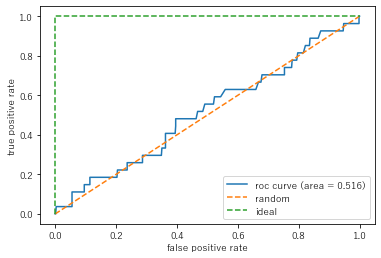

Lasso alpha=0.01
Cross-Validation scores: [0.92063492 0.92063492 0.91534392 0.91534392 0.92021277]
Average score: 0.918
使用された特徴量の数: 2

Lasso回帰
auc:0.518


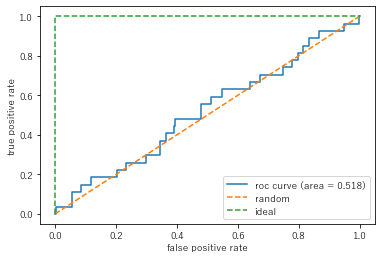

Lasso alpha=0.1
Cross-Validation scores: [0.92063492 0.92063492 0.91534392 0.91005291 0.90957447]
Average score: 0.915
使用された特徴量の数: 7

Lasso回帰
auc:0.600


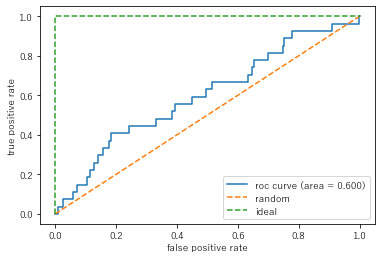

Lasso alpha=1.0
Cross-Validation scores: [0.92063492 0.92063492 0.9047619  0.91005291 0.90425532]
Average score: 0.912
使用された特徴量の数: 10

Lasso回帰
auc:0.651


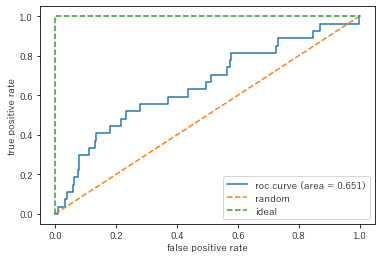

Lasso alpha=10.0
Cross-Validation scores: [0.92063492 0.92063492 0.9047619  0.91005291 0.90425532]
Average score: 0.912
使用された特徴量の数: 11

Lasso回帰
auc:0.679


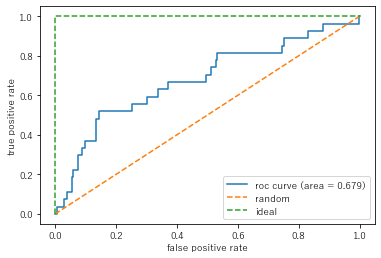

Lasso alpha=100.0
Cross-Validation scores: [0.92063492 0.92063492 0.9047619  0.91005291 0.90425532]
Average score: 0.912
使用された特徴量の数: 12

Lasso回帰
auc:0.677


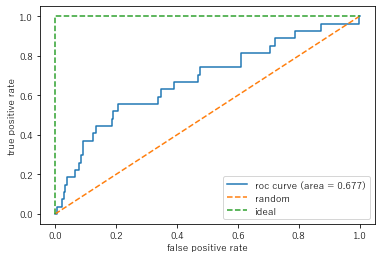

In [43]:
#u検定
#交差検証とハイパーパラメータのチューニング
param_grid = [0.0001 , 0.001, 0.01, 0.1, 1.0, 10.0,100.0]
for alpha in param_grid:
    clf_lasso = LogisticRegression(C=alpha,penalty = "l1",solver = "liblinear") #lassoと同じ正則化
    clf_lasso.fit(x_train_u_certificate,y_train)
    predict_lasso = clf_lasso.predict(x_test_u_certificate)
    predict_lasso_prob = clf_lasso.predict_proba(x_test_u_certificate)
    
    print(f'Lasso alpha={alpha}')
#     print(clf_lasso.intercept_)
#     print(clf_lasso.coef_)
    scores = cross_val_score(clf_lasso, x_train_u_certificate, y_train,cv=5)
    print(f'Cross-Validation scores: {scores}') # 各分割におけるスコア
    print(f'Average score: {np.mean(scores):.3f}') #平均スコア
#     print(f'trainning data:に対しての精度: {clf_lasso.score(x_train,y_train):.3f}')
#     print(f'test data:に対しての精度: {clf_lasso.score(x_test,y_test):.3f}')
    print(f'使用された特徴量の数: {np.sum(clf_lasso.coef_ != 0)}\n')
    
    Y_score = clf_lasso.predict_proba(x_test_u_certificate)[:, 1] # 検証データがクラス1に属する確率
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=Y_score)
    print('Lasso回帰')
    print(f'auc:{roc_auc_score(y_true=y_test, y_score=Y_score):.3f}')

    plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], linestyle='--', label='random')
    plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
    plt.legend()
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()


In [44]:
pd.DataFrame(x_train_u_certificate.columns).to_csv(f'特徴量{len(x_train_u_certificate.columns)}個(u検定とLasso).csv',index=False,header=False)

### lightgbmを使った分類予測精度の確認

Cross-Validation scores: [0.92592593 0.91005291 0.88359788 0.8994709  0.92021277]
Average score: 0.908
trainning data:に対しての精度: 1.000
test data:に対しての精度: 0.957
LightGBM
auc:0.647


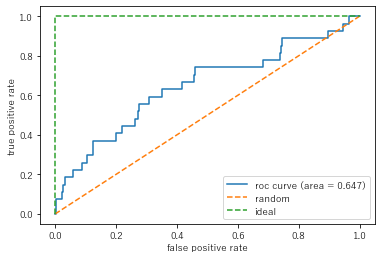

In [45]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(x_train_t_certificate, y_train) # モデルの学習

predict_lgb = model.predict(x_test_t_certificate)
predict_lgb_prob = model.predict_proba(x_test_t_certificate)

#     print(clf_lasso.intercept_)
#     print(clf_lasso.coef_)
scores = cross_val_score(model, x_train_t_certificate, y_train,cv=5)
print(f'Cross-Validation scores: {scores}') # 各分割におけるスコア
print(f'Average score: {np.mean(scores):.3f}') #平均スコア
print(f'trainning data:に対しての精度: {model.score(x_train_t_certificate,y_train):.3f}')
print(f'test data:に対しての精度: {model.score(x_test_t_certificate,y_test):.3f}')
# print(f'使用された特徴量の数: {np.sum(clf_lasso.coef_ != 0)}\n')

Y_score = model.predict_proba(x_test_t_certificate)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=Y_score)
print('LightGBM')
print(f'auc:{roc_auc_score(y_true=y_test, y_score=Y_score):.3f}')

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()


In [46]:
X = x_train.values

## Rulefitの実装
Rulefitについて : https://hacarus.github.io/interpretable-ml-book-ja/rulefit.html <br/>
実装 : https://github.com/christophM/rulefit

In [47]:
from sklearn.ensemble import GradientBoostingClassifier , GradientBoostingRegressor
from rulefit import RuleFit

max_depth=3

features = x_train.columns
gb = GradientBoostingClassifier(n_estimators=100, max_depth=max_depth,random_state=0)

In [48]:
rf = RuleFit(tree_generator = gb, rfmode= 'classify')
rf.fit(x_train.values, y_train.values,feature_names=features)

RuleFit(Cs=None, cv=3, exp_rand_tree_size=True, lin_standardise=True,
        lin_trim_quantile=0.025, max_iter=1000, max_rules=2000, memory_par=0.01,
        model_type='rl', n_jobs=None, random_state=None, rfmode='classify',
        sample_fract='default', tol=0.0001,
        tree_generator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=2,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2

正答率:0.920
適合率:0.074
再現率:0.074
F1スコア:0.074



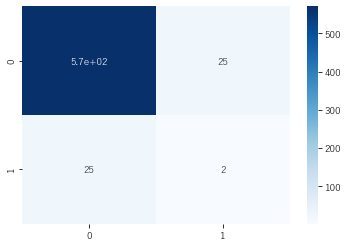

In [49]:
#Rulefitのモデルの評価
predict_rulefit = rf.predict(x_test.values)

tree_cm = confusion_matrix(predict_rulefit, y_test)

sns.heatmap(tree_cm,annot=True, cmap='Blues')
print(f'正答率:{accuracy_score(predict_rulefit,y_test):.3f}')
print(f'適合率:{precision_score(predict_rulefit,y_test):.3f}')
print(f'再現率:{recall_score(predict_rulefit,y_test):.3f}')
print(f'F1スコア:{f1_score(predict_rulefit,y_test):.3f}\n')

In [50]:
# Y_score = rf.predict_proba(x_test.values)[:, 1] # 検証データがクラス1に属する確率
# fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=Y_score)
# print('Rulefit')
# print(f'auc:{roc_auc_score(y_true=y_test, y_score=Y_score):.3f}')

# plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
# plt.plot([0, 1], [0, 1], linestyle='--', label='random')
# plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
# plt.legend()
# plt.xlabel('false positive rate')
# plt.ylabel('true positive rate')
# plt.show()

In [51]:
rules = rf.get_rules()

rules = rules[rules.coef != 0].sort_values("support", ascending=False) #supportは全体サンプルの割合

rules = pd.DataFrame(rules)

#csvの出力
rules.to_csv(f'Rulefit_treedepth{max_depth}_features{len(x_train.columns)}_.csv',index=None)

In [52]:
rules[rules['type'] == 'rule'].sort_values('importance',ascending=False)[0:20]

,rule,type,coef,support,importance
1366,584 <= 0.002849999931640923 & 484 <= 106.99049...,rule,3.260259,0.020127,0.457855
1702,301 > 0.41999998688697815 & 21 <= -5512.625 & ...,rule,-0.900517,0.550847,0.447924
721,132 <= 2.2418999671936035 & 442 <= 2.062549948...,rule,6.443822,0.004237,0.418567
1153,133 > 1011.5768127441406 & 26 <= 2.03939998149...,rule,5.260166,0.006356,0.418027
1327,114 <= 0.013900000136345625 & 113 <= 0.9493499...,rule,-0.867338,0.691737,0.400516
1621,425 > 3.8806999921798706 & 520 <= 1.0967000126...,rule,4.141645,0.008475,0.379650
1478,40 > 84.77000045776367 & 408 <= 6.371500015258789,rule,6.483381,0.003178,0.364909
1237,348 > 0.03464999981224537 & 442 > 2.0625499486...,rule,4.253020,0.007415,0.364875
1020,81 > -0.005699999863281846 & 298 > 0.068649999...,rule,2.445486,0.022246,0.360665
1525,473 <= 127.21685028076172 & 390 > 1.4103999733...,rule,-1.432975,0.058263,0.335659


### rulefitによって算出された新たな変数から特徴が見えないか把握する

### rulefitの組み合わせ(max_depth=2の場合)(上位20個)
348 > 0.03464999981224537 & 132 <= 2.2786500453948975 //不良品1 良品7
59 > 8.01640009880066 & 520 <= 1.0967000126838684 //不良品0 良品2
65 <= 14.25974988937378 & 224 <= 0.03699999861419201 //不良品1 良品1
391 <= 0.009099999908357859 & 335 <= 1.1665499806404114 //不良品0 良品2
81 > -0.005699999863281846 & 298 > 0.06864999979734421 //不良品2 良品26
433 > 922.8351135253906 & 116 <= 0.9894999861717224 //不良品0 良品4
348 > 0.03464999981224537 & 442 > 2.0625499486923218 //不良品0 良品4
541 > 12.062399864196777 & 65 > 37.47504997253418 //不良品0 良品0
156 > 0.13414999842643738 & 585 <= 2.0642499923706055 //不良品0 良品1
80 > 0.07580000162124634 & 160 <= 4053.0 //不良品2 良品5
79 > 0.05960000120103359 & 65 > 14.25974988937378 //不良品1 良品1
255 <= 0.36559998989105225 & 26 > 2.0393999814987183 //不良品0 良品0
168 <= 0.07149999961256981 & 335 <= 1.1665499806404114 //不良品2 良品30
432 > 75.49860000610352 & 25 > 1.3337500095367432 //不良品0 良品0
62 <= 110.29545211791992 & 475 > 5.710449934005737 //不良品0 良品1
300 <= 0.07795000076293945 & 25 > 1.3568499684333801 //不良品0 良品0
127 <= 0.5654999911785126 & 65 > 14.25974988937378 //不良品7 良品218
341 > 4.126999855041504 & 59 > 5.01455020904541 //不良品2 良品2
51 <= 41.60714912414551 & 210 <= 0.4740999937057495 //不良品0 良品1
301 > 2.911900043487549 //不良品0 良品1

### rulefitの組み合わせ(max_depth=3の場合)(上位20個)
331 > 0.02599999960511923 & 146 > 0.0426000002771616 & 40 <= 84.77000045776367 //不良品18 良品423
248 <= 0.010450000409036875 & 59 > 8.01640009880066 & 460 > 38.33209991455078 //不良品0 良品0
102 > -0.12530000135302544 & 59 > 8.01640009880066 & 520 <= 1.0967000126838684 //不良品0 良品2
113 <= 0.9500499963760376 & 40 <= 84.77000045776367 & 146 <= 0.0426000002771616 //不良品1 良品106
475 > 5.710449934005737 & 53 > 4.606499910354614 //不良品0 良品0
441 <= 1.2721499800682068 & 475 <= 5.556849956512451 & 310 > 0.3461500108242035 //不良品7 良品143
348 > 0.03464999981224537 & 71 > 22.752349853515625 & 442 > 2.0625499486923218 //不良品0 良品4
497 > 11.237299919128418 & 119 > 0.9810500144958496 //不良品0 良品20
152 > 0.7387000024318695 & 320 > 0.0705999992787838 & 33 <= 9.155550003051758 //不良品1 良品8
473 <= 127.21685028076172 & 390 > 1.408050000667572 //不良品0 良品21
295 <= 1942.9607543945312 & 424 > 3.940999984741211 & 587 > 0.004500000039115548 //不良品5 良品97
25 <= 1.3606500029563904 & 348 > 0.03630000166594982 & 132 <= 2.2786500453948975 //不良品1 良品5
555 <= 276.36934661865234 & 490 <= 30.23154926300049 & 435 <= 1.9713499546051025 //不良品1 良品5
117 <= 56.854549407958984 & 40 <= 84.77000045776367 & 22 <= 2451.5 //不良品0 良品4
40 <= 84.77000045776367 & 426 <= 0.3786499947309494 //不良品1 良品0
64 > 30.729100227355957 & 269 > 4.367949962615967 & 456 > 8.145650386810303 //不良品0 良品0
248 > 0.010450000409036875 & 333 > 7.20740008354187 & 59 > 8.01640009880066 //不良品1 良品3
77 <= -0.04270000010728836 & 64 > 30.729100227355957 //不良品0 良品1
119 <= 0.9595499932765961 & 59 > 8.01640009880066 //不良品0 良品0
64 > 30.729100227355957 & 269 > 4.529299974441528 & 77 > -0.04270000010728836 //不良品0 良品0

In [53]:
#testdateで確認(1個1個確認)　→　該当条件で不良品の傾向が見られる変数の組み合わせは○○だった
x_test_a = x_test.copy()
x_test_a['Pass/Fail'] = y_test
x_test_a[(x_test_a['64'] > 30.729100227355957) & 
         (x_test_a['269'] > 4.529299974441528) & 
         (x_test_a['77'] > -0.04270000010728836)
        ]['Pass/Fail'].value_counts()

Series([], Name: Pass/Fail, dtype: int64)

### 有用な組みあわせの散布図

テストデータ版


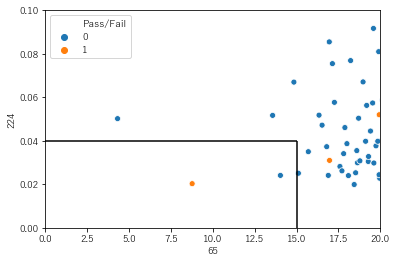

全データ版


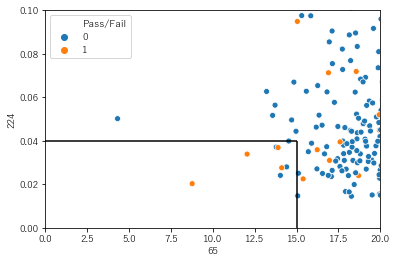

In [79]:
print('テストデータ版')
sns.scatterplot(x_test_a['65'],x_test_a['224'],hue=x_test_a['Pass/Fail'])
plt.xlim(0,20)
plt.ylim(0,0.1)
plt.hlines(y=0.04, xmin=0, xmax=15)
plt.vlines(x=15, ymin=0, ymax=0.04)

plt.show()

print('全データ版')
sns.scatterplot(df_median['65'],df_median['224'],hue=df_median['Pass/Fail'])
plt.xlim(0,20)
plt.ylim(0,0.1)
plt.hlines(y=0.04, xmin=0, xmax=15)
plt.vlines(x=15, ymin=0, ymax=0.04)

plt.show()

テストデータ版


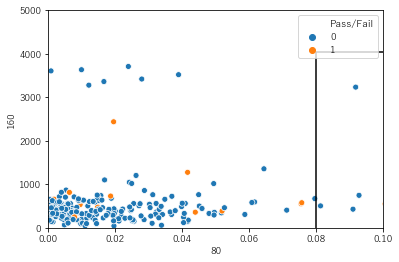

全データ版


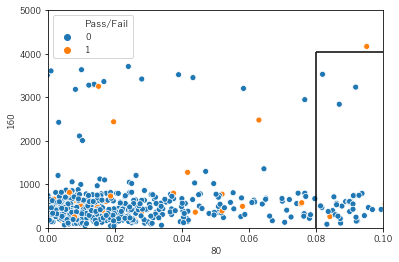

In [91]:
print('テストデータ版')
sns.scatterplot(x_test_a['80'],x_test_a['160'],hue=x_test_a['Pass/Fail'])
plt.xlim(0,0.1)
plt.ylim(0,5000)
plt.hlines(y=4053, xmin=0.08, xmax=0.1)
plt.vlines(x=0.08, ymin=0, ymax=4053)

plt.show()

print('全データ版')
sns.scatterplot(df_median['80'],df_median['160'],hue=df_median['Pass/Fail'])
plt.xlim(0,0.1)
plt.ylim(0,5000)
plt.hlines(y=4053, xmin=0.08, xmax=0.1)
plt.vlines(x=0.08, ymin=0, ymax=4053)

plt.show()

テストデータ版


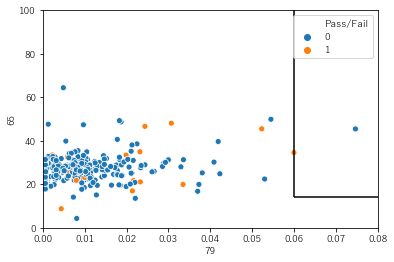

全データ版


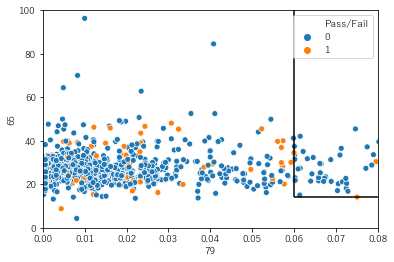

In [108]:
print('テストデータ版')
sns.scatterplot(x_test_a['79'],x_test_a['65'],hue=x_test_a['Pass/Fail'])
plt.xlim(0,0.08)
plt.ylim(0,100)
plt.hlines(y=14.26, xmin=0.06, xmax=0.1)
plt.vlines(x=0.06, ymin=14.26, ymax=100)

plt.show()

print('全データ版')
sns.scatterplot(df_median['79'],df_median['65'],hue=df_median['Pass/Fail'])
plt.xlim(0,0.08)
plt.ylim(0,100)
plt.hlines(y=14.26, xmin=0.06, xmax=0.1)
plt.vlines(x=0.06, ymin=14.26, ymax=100)

plt.show()

テストデータ版


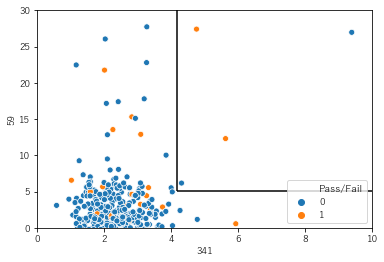

全データ版


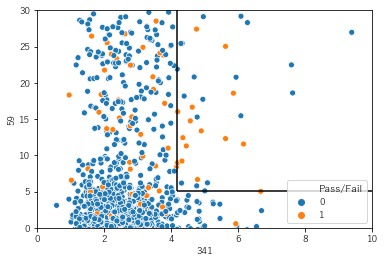

In [121]:
print('テストデータ版')
sns.scatterplot(x_test_a['341'],x_test_a['59'],hue=x_test_a['Pass/Fail'])
plt.legend(loc='lower right')
plt.xlim(0,10)
plt.ylim(0,30)
plt.hlines(y=5.01, xmin=4.17, xmax=100)
plt.vlines(x=4.17, ymin=5.01, ymax=100)

plt.show()

print('全データ版')
sns.scatterplot(df_median['341'],df_median['59'],hue=df_median['Pass/Fail'])
plt.legend(loc='lower right')
plt.xlim(0,10)
plt.ylim(0,30)
plt.hlines(y=5.01, xmin=4.17, xmax=100)
plt.vlines(x=4.17, ymin=5.01, ymax=100)

plt.show()

テストデータ版


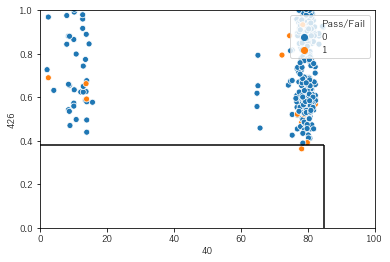

全データ版


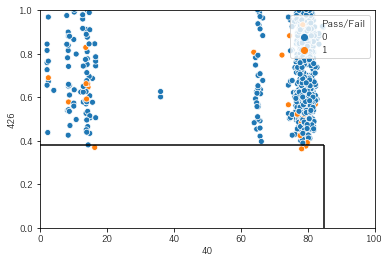

In [126]:
print('テストデータ版')
sns.scatterplot(x_test_a['40'],x_test_a['426'],hue=x_test_a['Pass/Fail'])
plt.legend(loc='upper right')
plt.xlim(0,100)
plt.ylim(0,1)
plt.hlines(y=0.38, xmin=0, xmax=84.77)
plt.vlines(x=84.77, ymin=0, ymax=0.38)

plt.show()

print('全データ版')
sns.scatterplot(df_median['40'],df_median['426'],hue=df_median['Pass/Fail'])
plt.legend(loc='upper right')
plt.xlim(0,100)
plt.ylim(0,1)
plt.hlines(y=0.38, xmin=0, xmax=84.77)
plt.vlines(x=84.77, ymin=0, ymax=0.38)

plt.show()

### Rulefitによって算出された有用な組み合わせは<span style="color: red; ">**「65」と「224」 ,「341」と「59」 ,「40」と「426」**</span>である